# Las redes neuronales convolucionales

Provienen del inglés Convolutional Neural Networks (CNN) fueron desarrolladas originalmente para tareas de visión por computadora, pero también se han utilizado en el procesamiento de señales 2D.


## Caracteristicas generales

Las CNN utilizan capturan características locales o patrones importantes en los datos, como bordes, texturas y formas. Los mismos filtros se aplican repetidamente a diferentes partes de la entrada. Esto reduce significativamente el número de parámetros que necesita ser entrenado en comparación con un MLP. Además, permite que las CNN sean más robustas ante traslaciones en los datos de entrada.

Se podría decir que las CNN aprenden características jerárquicas a diferentes niveles de abstracción. Las primeras capas pueden detectar características simples como bordes, mientras que las capas posteriores pueden combinar estas características simples para reconocer patrones más complejos como texturas, estas a su vez permiten crear formas y elementos mas abstractos.

## Elementos principales



### Capas convolucionales

Son la parte central de una CNN. Utilizan **filtros o kernels** para realizar operaciones de convolución en la entrada. Estos filtros se deslizan a través de la imagen y calculan productos escalares locales, lo que permite detectar características como bordes, texturas y patrones simples. Durante el entrenamiento, las CNN aprenden automáticamente los filtros que son relevantes para la tarea.
Estos filtros son pequeñas matrices (generalmente 3x3 o 5x5) y cada filtro captura un patrón o característica específica de la imagen.

![kernel](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fanalyticsindiamag.com%2Fwp-content%2Fuploads%2F2018%2F01%2Fconv-full-layer.gif&f=1&nofb=1&ipt=1211358446d5c2bd13e1fc5aabe6a2f1d45c6a6b247a992dbe49e9fabaaefa99&ipo=images)

Los **strides** (pasos) controlan cómo se mueve el filtro a medida que se desliza sobre la entrada. Un stride de 1 significa que el filtro se desplaza una posición a la vez. Un stride mayor que 1 hará que el filtro se mueva más rápido, lo que reduce la dimensión del mapa de características de salida.

![stride](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fm-alcu.github.io%2Fassets%2Fstride2.gif&f=1&nofb=1&ipt=4cec183c82bd0b3edc22ef45d6778dfd51e0940bbeb94d469d46485c68ced4cf&ipo=images)

A menudo, se agrega un **padding** (relleno) a la entrada antes de aplicar la convolución. El padding consiste en agregar píxeles (generalmente con valor cero) alrededor de la entrada. Esto se hace para asegurarse de que los bordes de la imagen se procesen adecuadamente y para controlar el tamaño de la salida.

El tamaño del mapa de características de salida depende de la dimensión de la entrada, el tamaño del filtro, los strides y el padding. Se puede calcular el tamaño de salida utilizando la siguiente fórmula para una dimensión específica (por ejemplo, el ancho):

$$T_{Salida} = \frac{(T_{Entrada} - T_{Filtro} + 2 * Padding)} {Stride} + 1$$

## Capas de agrupación (Pooling)

Estas capas se utilizan para reducir la dimensionalidad espacial de las representaciones intermedias, lo que disminuye el número de parámetros y computaciones requeridas, conservando la información relevante. Los dos tipos más comunes de operaciones de agrupación son MaxPooling y AveragePooling.

Las capas de agrupación introducen cierto grado de invarianza espacial en las representaciones. Esto significa que la red será capaz de reconocer patrones o características incluso cuando estén ubicados en diferentes partes de la imagen o cuando se presenten en diferentes escalas.

Al igual que en las capas convolucionales, en las capas de agrupación se utiliza una ventana o **kernel** para especificar el área sobre la cual se realiza la operación de agrupación. Por ejemplo, un MaxPooling 2x2 tomará el valor máximo de un bloque de 2x2 píxeles en la entrada.

Aqui también aplica el concepto de stride para definir como se moverá la ventana.

![pooling](https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif)








## Capas completamente conectadas

Después de varias capas convolucionales y de agrupación, se suelen agregar una o más capas completamente conectadas, similares a las de una red neuronal tradicional. Estas capas finales realizan la clasificación o regresión final basada en las características extraídas en las capas anteriores.

![FCL](https://stanford.edu/~shervine/teaching/cs-230/illustrations/fully-connected-ltr.png?32caf9e07c79d652faa292812579d063)





## Capa de salida

La capa de salida produce la predicción final de la red, que puede ser un conjunto de probabilidades para varias clases en un problema de clasificación o un valor numérico en un problema de regresión.

## Implementación

Vamos a seguir el [tutorial](https://www.tensorflow.org/tutorials/images/cnn) de Tensorflow en Convolutional Neural Networks



In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/09/63/25e76075081ea98ec48f23929cefee58be0b42212e38074a9ec5c19e838c/tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 739.1 kB/s eta 0:00:001m988.7 kB/s eta 0:00:01
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/1e/e9/61d7338e503d63d2ce733373fa86256614f579b

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt

2023-10-14 10:43:38.211354: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-14 10:43:38.311152: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-14 10:43:38.311227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-14 10:43:38.311269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-14 10:43:38.326044: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-14 10:43:38.327411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

### Descargar y preparar el conjunto de datos CIFAR10

El conjunto de datos CIFAR10 contiene 60,000 imágenes a color distribuidas en 10 clases, con 6,000 imágenes en cada clase. El conjunto de datos está dividido en 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay traslape entre ellas.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 38s 0us/step


In [4]:
# normalizar las imagenes
train_images, test_images = train_images / 255.0, test_images / 255.0

Vamos a explorar los datos generando algunas visualizaciones.

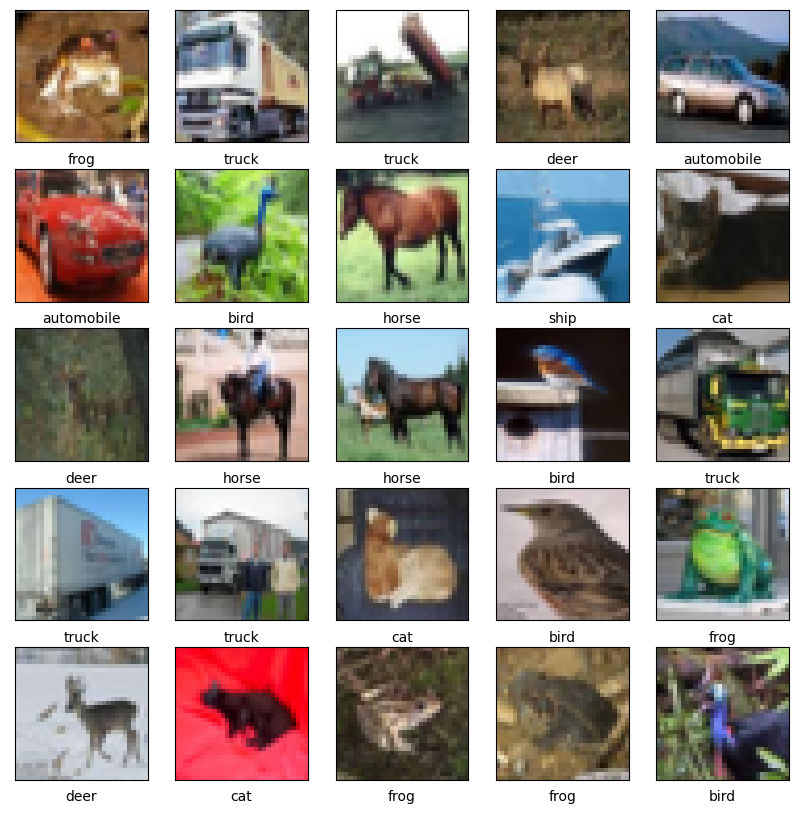

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Modelo

Creamos el modelo para entrenar

In [6]:
model = models.Sequential()
# 32 filtros distintos 32 x32 pixeles  3 canales de color
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# pasar de arreglo ndimensional a 1 dimensional
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

# como no pusimos padding perdemos dos pixeles en la primera capa

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

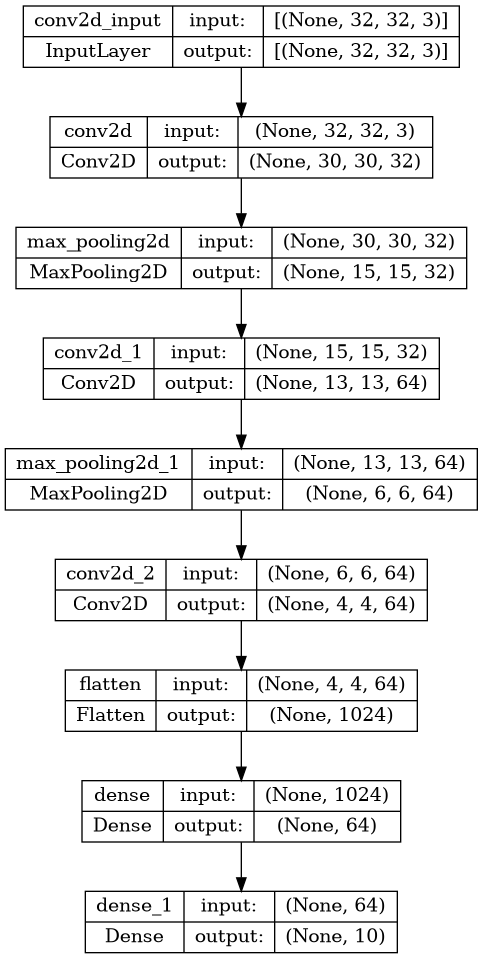

In [7]:
utils.plot_model(model, show_shapes=True)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


2023-10-14 10:50:45.300474: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 38s 23ms/step - loss: 1.5107 - accuracy: 0.4472 - val_loss: 1.3196 - val_accuracy: 0.5249
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1400 - accuracy: 0.5971 - val_loss: 1.0556 - val_accuracy: 0.6248
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9949 - accuracy: 0.6515 - val_loss: 1.0390 - val_accuracy: 0.6418
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8905 - accuracy: 0.6876 - val_loss: 0.9025 - val_accuracy: 0.6887
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8202 - accuracy: 0.7133 - val_loss: 0.8919 - val_accuracy: 0.6955
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7647 - accuracy: 0.7320 - val_loss: 0.8541 - val_accuracy: 0.7074
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7116 - accuracy: 0.7516 - val_loss: 0.8681 - val_accura

313/313 - 3s - loss: 0.8905 - accuracy: 0.7095 - 3s/epoch - 9ms/step


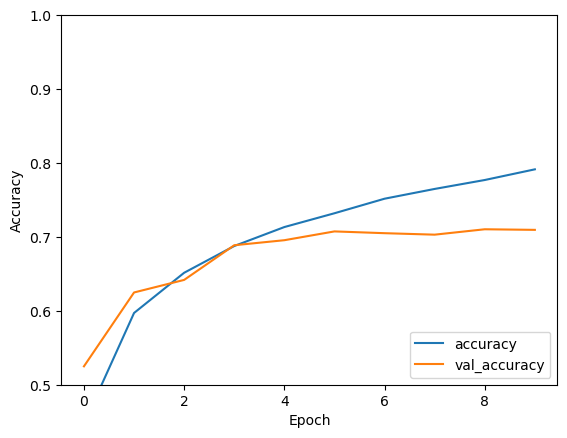

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc*100)

# Transfer learning

Se puede encontrar también como *"aprendizaje por transferencia"*, es una técnica que implica tomar un modelo entrenado previamente en una tarea y adaptarlo para resolver otra tarea relacionada, en lugar de entrenar un modelo desde cero para una tarea específica.

Los modelos preentrenados ya contienen conocimiento útil aprendido de grandes conjuntos de datos. Esto ahorra tiempo y recursos en comparación con entrenar desde cero. Esto puede mejorar significativamente el rendimiento en la nueva tarea, especialmente cuando los datos de entrenamiento son limitados.

Así también, los modelos preentrenados muchas veces pueden ser modelos generados por grupos de expertos con acceso a una gran cantidad de datos y recursos computacionales. Por lo que tratar de equiparar estos modelos puede ser una tarea complicada.

**El flujo típico de transfer learning**

1. Instanciar un modelo base y cargar pesos preentrenados en él.
2. Congelar todas las capas en el modelo base estableciendo
3. Crear un nuevo modelo sobre la salida de una (o varias) capas del modelo base.
4. Entrenar el nuevo modelo con un nuevo conjunto de datos.

Existe una alternativa a la cual se refiere como extracción de características. Donde se utilizan todas menos las ultimas capas del modelo, junto con los nuevos datos, para crear un nuevo datset. Este será utilizado como insumo para un nuevo modelo mas pequeño adaptado al problema que se quiere atacar.


## Ejemplo de implementacion

Veremos un ejemplo de implementación de transfer learning.

En este caso utilizaremos el modelo [VGG-16](https://arxiv.org/abs/1505.06798) el cual fue entrenado en un subconjunto de [ImageNet](https://www.image-net.org) el cual es una colección de mas de 14 millones de imágenes y 22,000 categorias. El modelo logró 92.7% de accuracy en la clasificación.

El modelo es capaz de detectar flores pero no discernir entre ellas, por lo que utilizaremos el conjunto de datos[tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers) para entrenar un clasificador basado en el modelo.


In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf

import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"],
    batch_size=-1,
    as_supervised=True,
)

In [ ]:
train_images = tf.image.resize(train_images, (150, 150))
test_images = tf.image.resize(test_images, (150, 150))

train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [ ]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_images[0].shape)
base_model.trainable = False

## Preprocessing input
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)
base_model.summary()

In [ ]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(5, activation='softmax')
])
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(train_images, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])


In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


hand_made_model = Sequential()
hand_made_model.add(Rescaling(1./255, input_shape=(150,150,3)))

hand_made_model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
hand_made_model.add(layers.MaxPooling2D(3))

hand_made_model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
hand_made_model.add(layers.MaxPooling2D(2))

hand_made_model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
hand_made_model.add(layers.MaxPooling2D(2))

hand_made_model.add(layers.Flatten())
hand_made_model.add(layers.Dense(50, activation='relu'))
hand_made_model.add(layers.Dense(20, activation='relu'))
hand_made_model.add(layers.Dense(5, activation='softmax'))


hand_made_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

hand_made_model.fit(train_images, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])
